In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df = pd.read_csv(r"C:\Users\pulla\Downloads\crowdfunding_campaigns.csv")

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Campaign Name   5 non-null      object
 1   Category        5 non-null      object
 2   Goal Amount     5 non-null      int64 
 3   Pledged Amount  5 non-null      int64 
 4   Launch Date     5 non-null      object
 5   End Date        5 non-null      object
 6   Backers         5 non-null      int64 
 7   Country         5 non-null      object
 8   Currency        5 non-null      object
 9   Success Status  5 non-null      int64 
dtypes: int64(4), object(6)
memory usage: 528.0+ bytes


In [6]:
df.isnull().sum()

Campaign Name     0
Category          0
Goal Amount       0
Pledged Amount    0
Launch Date       0
End Date          0
Backers           0
Country           0
Currency          0
Success Status    0
dtype: int64

In [7]:
df['Launch Date'] = pd.to_datetime(df['Launch Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

In [8]:
df['Campaign Duration'] = (df['End Date'] - df['Launch Date']).dt.days

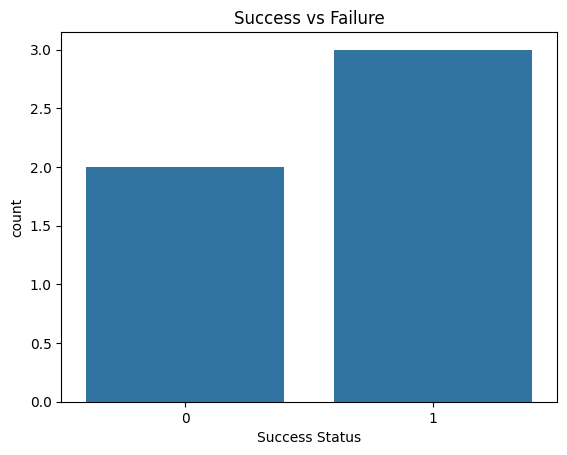

In [9]:
sns.countplot(x='Success Status', data=df)
plt.title('Success vs Failure')
plt.show()

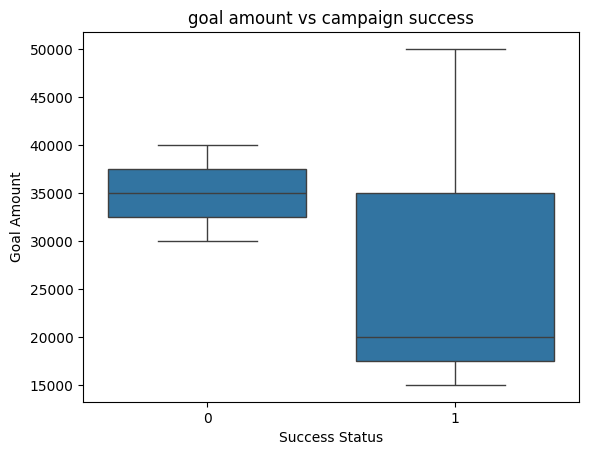

In [12]:
sns.boxplot(x='Success Status', y = 'Goal Amount', data=df)
plt.title('goal amount vs campaign success')
plt.show()

In [13]:
label_encoders = {}
for column in ['Category', 'Country', 'Currency']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [16]:
X = df[['Category', 'Goal Amount', 'Backers', 'Country', 'Currency']]
y = df['Success Status']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf_model.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)

In [23]:
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\pulla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pulla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pulla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [24]:
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

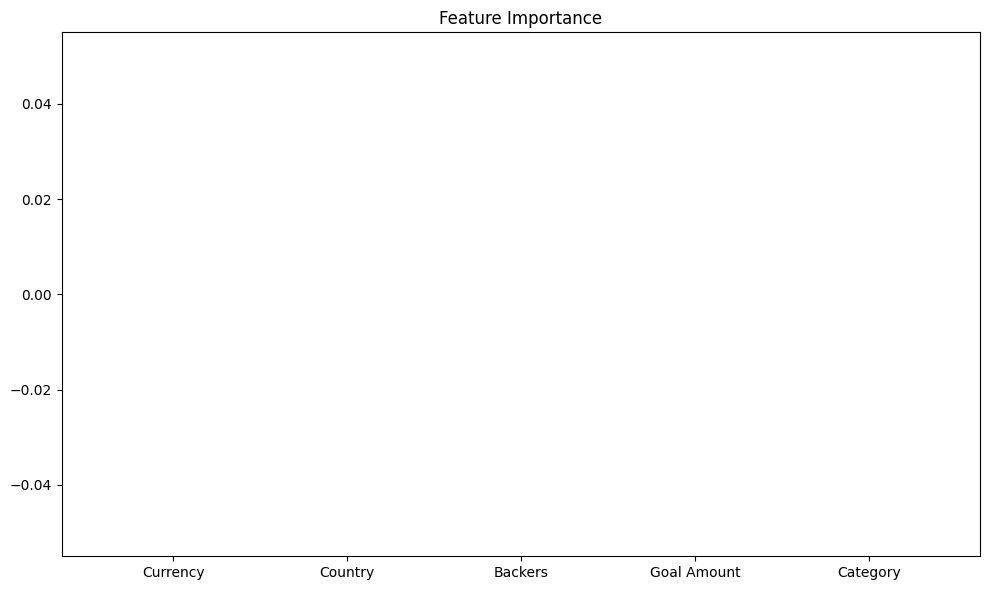

In [25]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.tight_layout()
plt.show()